In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
metrics_df = pd.read_csv("../metrics.csv")
solutions_df = pd.read_csv("../solutions_history.csv")

In [65]:
metrics_df.head()

,ID,File Instance,TS Score,TS Time,TS Memory,TS Tenure,Candidate List Size,Max Iterations
0,1,data/a_example_2.in,248,7.527940,190780,9,30,100
1,2,data/a_example_2.in,248,11.783381,190897,9,30,100
2,3,data/a_example_3.in,375,62.493712,884180,9,100,100
3,4,data/a_example_4.in,2188,4527.210279,36770808,9,-1,100
4,5,data/a_example_4.in,2188,989.216815,8075535,9,300,100


In [66]:
# Merge the dataframes on 'ID' with 'outer' join
merged_df = pd.merge(solutions_df, metrics_df, on="ID")
merged_df

,ID,Solution History,File Instance,TS Score,TS Time,TS Memory,TS Tenure,Candidate List Size,Max Iterations
0,1,146,data/a_example_2.in,248,7.527940,190780,9,30,100
1,1,213,data/a_example_2.in,248,7.527940,190780,9,30,100
2,1,248,data/a_example_2.in,248,7.527940,190780,9,30,100
3,1,228,data/a_example_2.in,248,7.527940,190780,9,30,100
4,1,206,data/a_example_2.in,248,7.527940,190780,9,30,100
...,...,...,...,...,...,...,...,...,...
500,5,2188,data/a_example_4.in,2188,989.216815,8075535,9,300,100
501,5,2188,data/a_example_4.in,2188,989.216815,8075535,9,300,100
502,5,2188,data/a_example_4.in,2188,989.216815,8075535,9,300,100
503,5,2188,data/a_example_4.in,2188,989.216815,8075535,9,300,100


In [67]:
# Function to create solutions evolution for each ID
def create_chart_for_id(ax, df, id_value):
    id_df = df[df['ID'] == id_value]
    if id_df['Candidate List Size'].iloc[0] == -1:
        candidate_list_info = "Candidate List Size: All"
    else:
        candidate_list_info = f"Candidate List Size: {id_df['Candidate List Size'].iloc[0]}"

    ax.plot(range(len(id_df)), id_df['Solution History'], color="black", label=f"Tabu Tenure: {id_df['TS Tenure'].iloc[0]}\n{candidate_list_info}")
    #plt.scatter(id_df.index, id_df['Solution History'], color='black')
    ax.set_xlabel('Iterations')

    ax.set_ylabel('Solution Score')
    ax.set_title(f"{id_df['File Instance'].iloc[0].split('/')[1]} solution history")
    ax.legend()

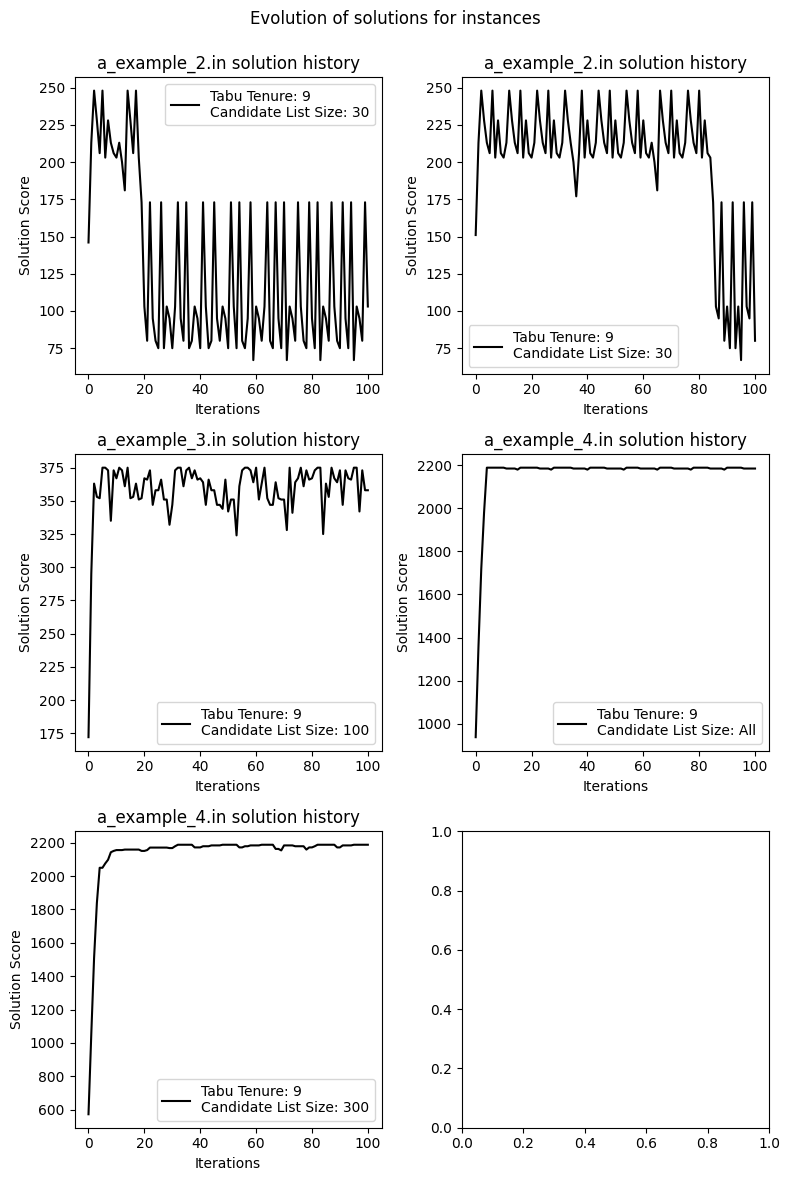

In [68]:
unique_file_ids = merged_df['ID'].unique()
num_instances = len(unique_file_ids)
num_rows = (num_instances + 1) // 2  # Calculate the number of rows needed for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(8, 4*num_rows))

for i, id in enumerate(unique_file_ids):
    row = i // 2
    col = i % 2
    if num_rows == 1:
        ax = axes[col]
    else:
        ax = axes[row, col]
    create_chart_for_id(ax, merged_df, id)

# Adjust layout
fig.suptitle("Evolution of solutions for instances\n")
plt.tight_layout()
plt.show()